In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
test_prompt = ['미래 도시에 대한 본인의 생각', '한류를 지키는 방법', '참된 스승', '이상형과 나의 노력',
                   'e스포츠에 대한 본인 생각 작성', '카피레프트 운동에 대한 본인의 의견을 작성']

In [3]:
task = 'cross_prompt'
measure = 'total_cont'
prompt = test_prompt[0]
print(prompt)


sen_pos_sal_sim = pd.read_pickle("./result/explainability/cross_prompt/{}/test_sen_pos_sal_sim.pkl".format(prompt))
sim_sen_pos = pd.read_pickle("./result/explainability/cross_prompt/{}/test_sim_sen_pos.pkl".format(prompt))
sen_sal_sim = pd.read_pickle("./result/explainability/cross_prompt/{}/test_sen_sal_sim.pkl".format(prompt))
sim_sen = pd.read_pickle("./result/explainability/cross_prompt/{}/test_sim_sen.pkl".format(prompt))
sen = pd.read_pickle("./result/explainability/cross_prompt/{}/test_sentences.pkl".format(prompt))
key_sal_sim = pd.read_pickle("./result/explainability/cross_prompt/{}/test_key_sal_sim.pkl".format(prompt))
sim_key = pd.read_pickle("./result/explainability/cross_prompt/{}/test_sim_key.pkl".format(prompt))
key = pd.read_pickle("./result/explainability/cross_prompt/{}/test_keywords.pkl".format(prompt))



미래 도시에 대한 본인의 생각


In [4]:
mean_sentence_simlarity = []
for s in sen_sal_sim:
    mean_sentence_simlarity.append(s.mean().item())

In [5]:
prompt_sens = np.array(pd.read_pickle('./data/prompt/prompt_sentences.pkl'))
prompt_ids = pd.read_pickle('./data/prompt/prompt_ids.pkl')
id = prompt_ids[prompt]
prompt_sentences = prompt_sens[id] 
prompt_idx = (prompt_sentences != '<PAD>')
prompt_list = list(prompt_sentences[prompt_idx])

In [6]:
dim = 4
dim = 4
test_cont_pred = pd.read_pickle('./result/cross_prompt/{}_test_cont_pred.pkl'.format(prompt))
test_cont_true = pd.read_pickle('./result/cross_prompt/{}_test_cont_true.pkl'.format(prompt))
print('pred: ', test_cont_pred[dim])
print('true: ', test_cont_true[dim])

pred:  6.631753
true:  5.8823533


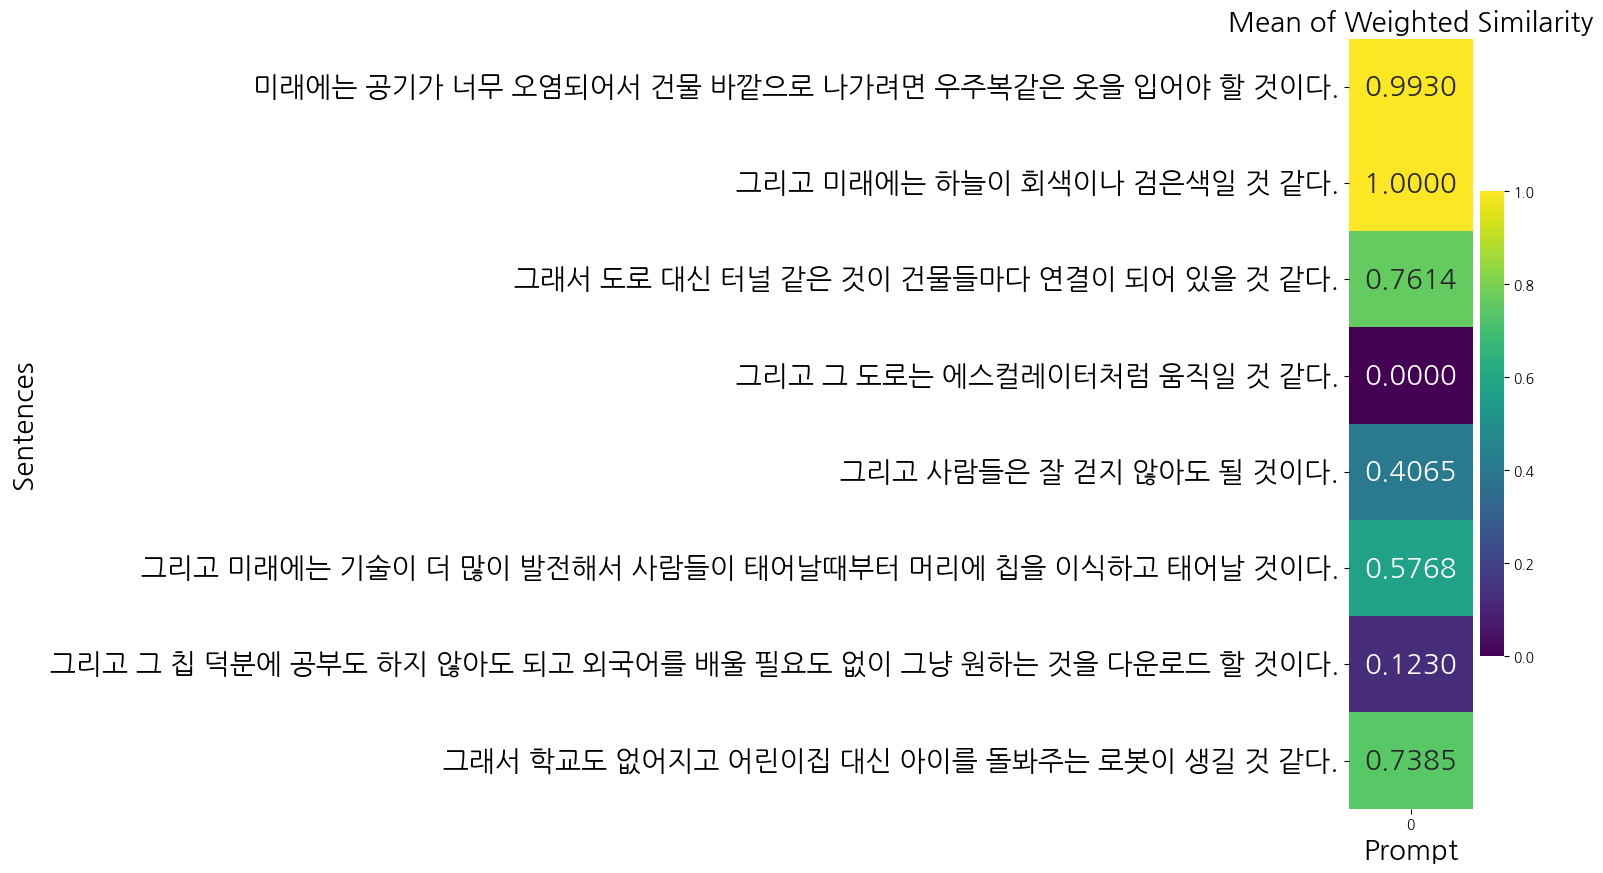

In [11]:
idx = (sen[dim:dim+1] != '<PAD>')


X_mean = sim_sen[dim:dim+1][:,:idx.squeeze().sum(),:prompt_idx.sum()].mean(dim=2).T

min = sim_sen[dim:dim+1][:,:idx.squeeze().sum(),:prompt_idx.sum()].mean(dim=2).T.min()
max = sim_sen[dim:dim+1][:,:idx.squeeze().sum(),:prompt_idx.sum()].mean(dim=2).T.max()
mean = sim_sen[dim:dim+1][:,:idx.squeeze().sum(),:prompt_idx.sum()].mean(dim=2).T.mean()
std = sim_sen[dim:dim+1][:,:idx.squeeze().sum(),:prompt_idx.sum()].mean(dim=2).T.std()
x_norm = (X_mean-min)/(max-min)
std_x = (X_mean-mean)/std

median = X_mean.median(dim=0, keepdim=True)[0]

# IQR calculation
q1 = X_mean.quantile(0.25, dim=0, keepdim=True)
q3 = X_mean.quantile(0.75, dim=0, keepdim=True)
iqr = q3 - q1

# MinMax Scaling 
minmax_scaled = (X_mean-min)/(max-min)
# Robust Scaling 
robust_x = (X_mean - median) / iqr




# Hitmap
plt.figure(figsize=(2, 10))  # viz size
hm = sns.heatmap(minmax_scaled, annot=True, fmt=".4f", cmap='viridis',
            yticklabels=sen[dim:dim+1][idx], annot_kws={'size':20})  
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=20)  

plt.ylabel('Sentences', fontsize=20)  
plt.xlabel('Prompt', fontsize=20)  
plt.title('Mean of Weighted Similarity', fontsize=20)

plt.show()  